In [1]:
import pandas as pd
from conceptualDesign.conceptualDesign import conceptualDesign
from misc.openData import openData
from misc.materials import load_materials
import matplotlib.pyplot as plt

In [2]:
material_data: dict = load_materials()

parameters = openData("design1")
params, df = conceptualDesign(parameters, material_data)

In [3]:
df[["fuelMass", "balloonVolume", "requiredEnergy", "totalMass"]]

,fuelMass,balloonVolume,requiredEnergy,totalMass
0,47909.128010,0.000000,5.795088e+12,1.499328e+05
1,55480.130706,818.382389,6.710877e+12,4.954557e+05
2,74174.101971,947.710046,8.972099e+12,6.205510e+05
3,82201.306725,1267.039941,9.943070e+12,7.821334e+05
4,91278.025918,1404.160429,1.104099e+13,8.792796e+05
...,...,...,...,...
95,121230.087389,2070.848972,1.466399e+13,1.298313e+06
96,121230.087401,2070.848972,1.466399e+13,1.298313e+06
97,121230.087410,2070.848972,1.466399e+13,1.298313e+06
98,121230.087418,2070.848972,1.466399e+13,1.298313e+06


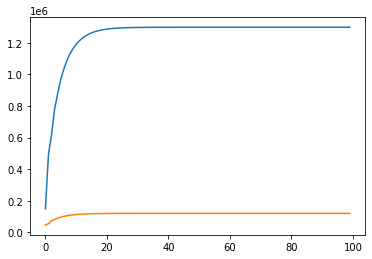

In [4]:
plt.plot(df.index, df.totalMass, df.fuelMass)